# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:

# Load the CSV file
df = pd.read_csv('Wholesale_Data.csv')

# Preview the data
print(df.head())
print(df.info())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
summary_stats = df.describe().T
summary_stats['median'] = df.median()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                   count          mean           std   min      25%     50%  \
Channel           440.0      1.322727      0.468052   1.0     1.00     1.0   
Region            440.0      2.543182      0.774272   1.0     2.00     3.0   
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Grocery           440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Frozen            440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicassen        440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                       75%       max  median  
Channel               2.00       2.0     1.0  
Region                3.00       3.0     3.0  
Fresh             16933.75  112151.0  8504.0  
Milk               7190.25   73498.0  3627.0  
Grocery           10655.75   92780.0  475

In [6]:
#Data Cleaning: Check for missing or incorrect data

print("Missing Values:\n", df.isnull().sum())
# No missing values found, but here's the code
# df.fillna(df.median(), inplace=True)

Missing Values:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


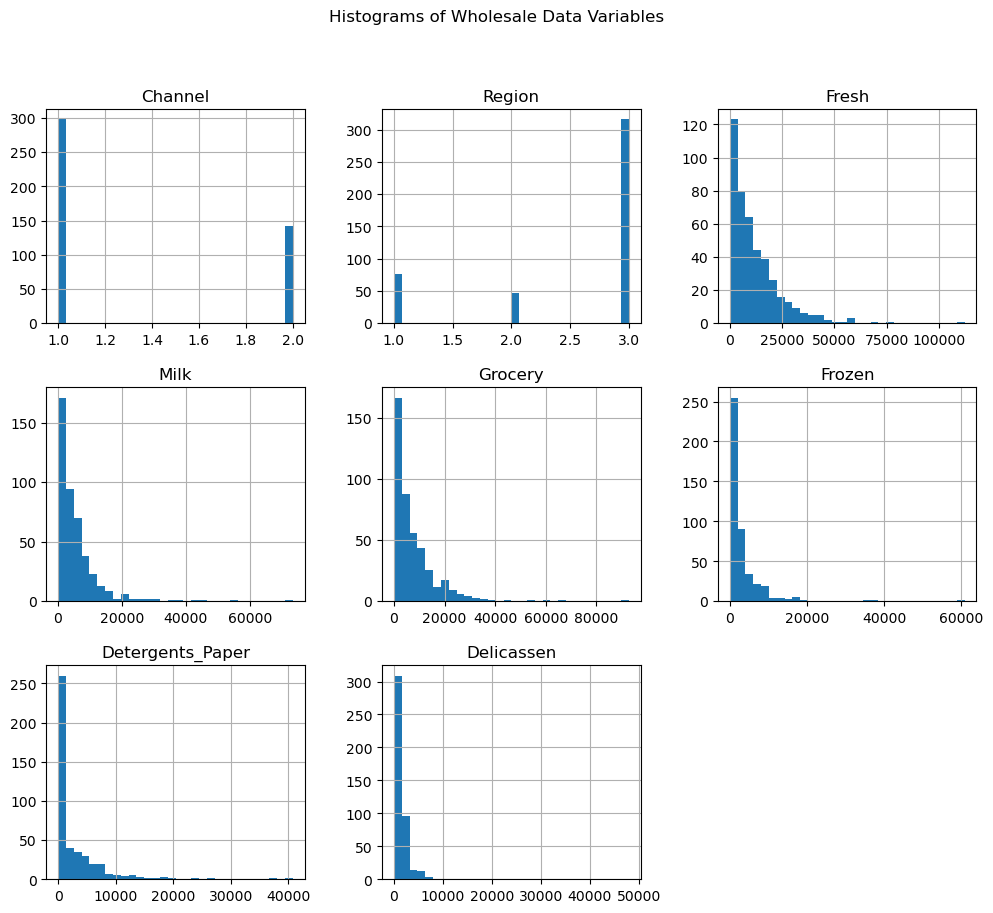

In [7]:
#Data Visualization
# Histograms
df.hist(bins=30, figsize=(12, 10))
plt.suptitle('Histograms of Wholesale Data Variables')
plt.show()

### Channel & Region
Observation: These are categorical but stored as numeric (likely encoded as integers).

Distribution: Distinct spikes at discrete values (1, 2, 3) showing group counts.

Action: Categorical features - possibly one-hot encode


### Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen
Observation: All are heavily right-skewed (long tail). Most values are small, but there are some very large values (outliers).

Distribution: Most data is concentrated at the lower end (near 0), with few high-spending customers or transactions.

Action:

Log transformation for normalization.

Identify and assess outliers – are they real or errors?

In [8]:
# Apply log transformation with +1 (Why +1? To handle zero values safely (avoid math errors))

skewed_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df[skewed_features] = np.log1p(df[skewed_features])

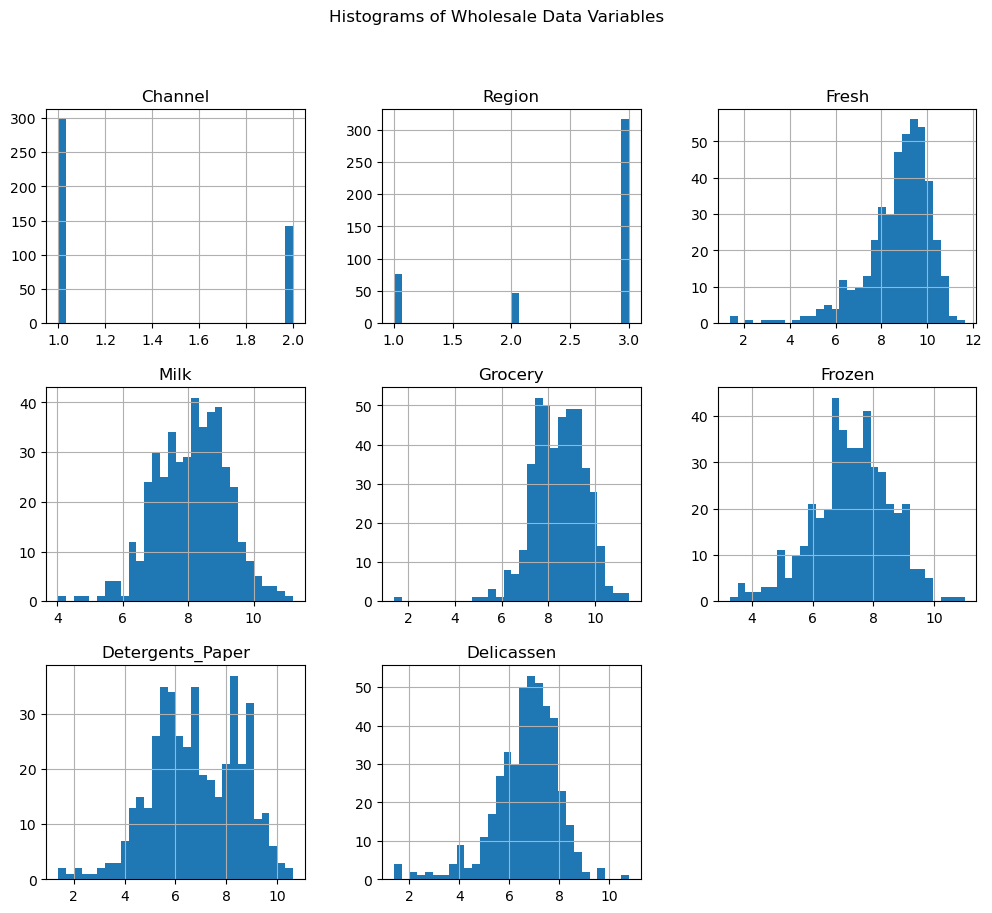

In [9]:
df.hist(bins=30, figsize=(12, 10))
plt.suptitle('Histograms of Wholesale Data Variables')
plt.show()

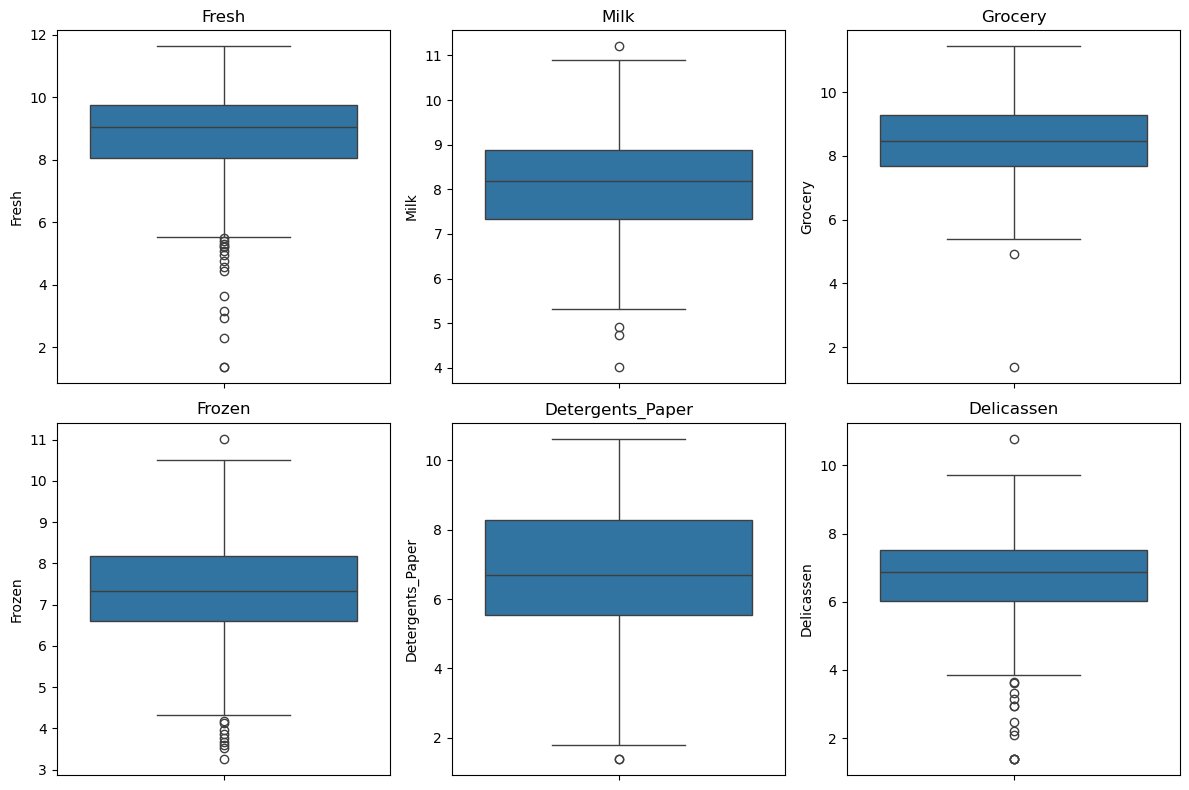

In [10]:
# Boxplots
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[2:]):  # Skip Channel and Region
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

Outliers might represent valuable customer segments (large wholesale clients), which are essential in business insights. 

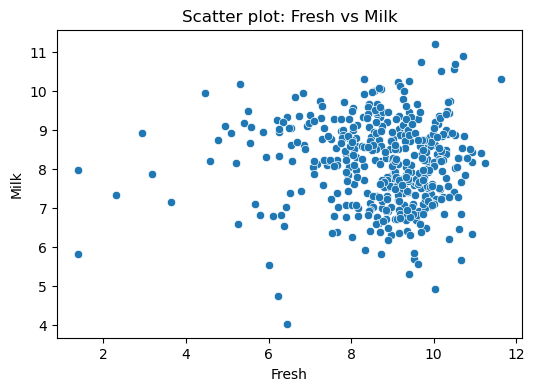

In [11]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Fresh', y='Milk')
plt.title('Scatter plot: Fresh vs Milk')
plt.show()


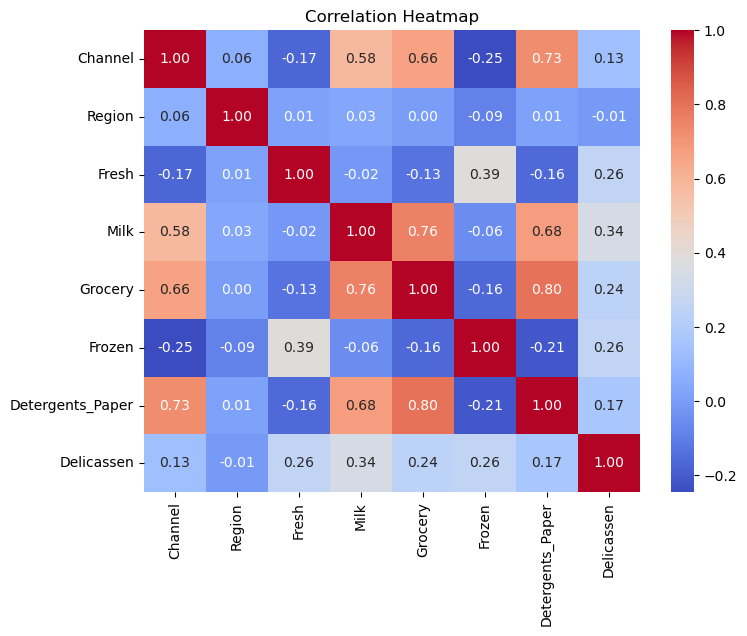

In [12]:
# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Calculate correlation matrix 
corr_matrix = df.corr()

# Threshold for high correlation
threshold = 0.7

# Find high correlation pairs (excluding self-correlations)
high_corr_pairs = (
    corr_matrix.abs()
    .unstack()
    .sort_values(ascending=False)
    .drop_duplicates()
)

# Filter to only include high correlations above threshold
high_corr_pairs = high_corr_pairs[
    (high_corr_pairs < 1) & (high_corr_pairs >= threshold)
]

print("High Correlation Pairs:")
print(high_corr_pairs)

High Correlation Pairs:
Detergents_Paper  Grocery             0.797141
Grocery           Milk                0.761128
Channel           Detergents_Paper    0.727093
dtype: float64


In [14]:
# Data Transformation: Standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=[int, float]))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)
print("Data has been standardized.")

Data has been standardized.


 High correlations mean these features might not provide unique information. PCA can help reduce dimensionality by combining them into fewer components

Explained variance ratio by PCA components:
 [0.40745378 0.20584351 0.12626463 0.08164153 0.07437532 0.04982228
 0.03227656 0.02232238]


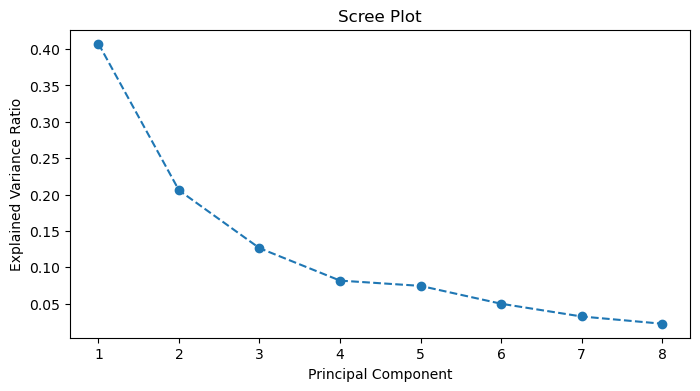

In [15]:
# Feature Selection: PCA
pca = PCA()
pca.fit(df_scaled)
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio by PCA components:\n", explained_variance)

# Scree plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

Silhouette score:
 [0.3134062994598435, 0.20181415152661547, 0.211913481076788, 0.20250001654033412, 0.19904643560325522, 0.17519668803758692, 0.21902561978048327, 0.21193604969058055, 0.20439781845790245]


C:\Users\ipeko\AppData\Local\Temp\ipykernel_24484\3792475205.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K, silhouette, 'ro-', marker='s')


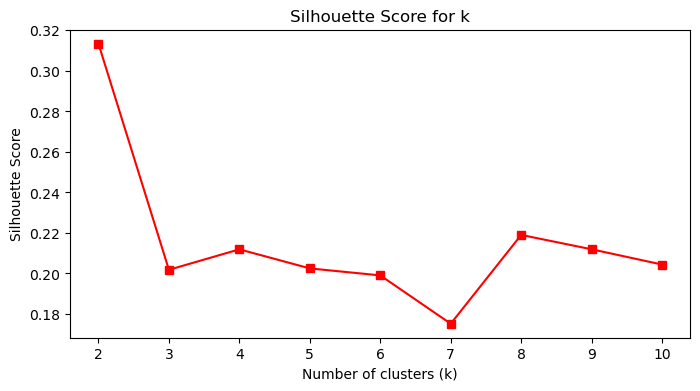

C:\Users\ipeko\AppData\Local\Temp\ipykernel_24484\3792475205.py:31: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K, inertia, 'bo-', marker='o')


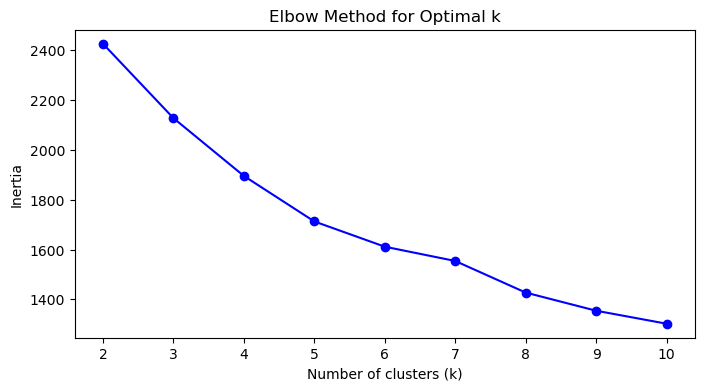

Cluster Centers (approximate):
     Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.944828  2.641379  8.272982  9.048133  9.526561  6.702881   
1  1.007194  2.690647  8.473210  7.138932  7.469444  7.096455   
2  1.025641  2.320513  9.391534  8.136026  8.301065  8.045200   

   Detergents_Paper  Delicassen  
0          8.651697    6.863738  
1          5.381530    5.785852  
2          6.319583    7.280809  


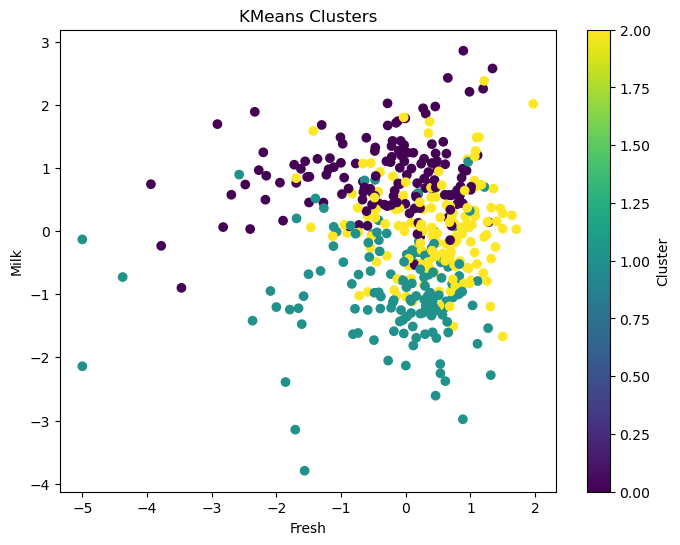

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Determine optimal number of clusters (Elbow Method)
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(scaled_features, kmeans.labels_))

#inertia_: Sum of distances from points to their assigned cluster’s center (lower is better, up to a point)


print("Silhouette score:\n", silhouette)

# Plot Silhouette Score (Optional)
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette, 'ro-', marker='s')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for k')
plt.show()

# Plot Inertia (Elbow Method)
#You look for the “elbow point” where the inertia stops decreasing sharply — that’s a good value for k.
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-', marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Optimal k (from elbow/silhouette) and run final KMeans
optimal_k = 3  # Choosed based on the plots
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(scaled_features)

# Add cluster labels to the dataframe
df_clusters = df_scaled.copy()
df_clusters['Cluster'] = clusters

# Review cluster centroids (mean values per cluster)
#inverse_transform(...): Converts the standardized values back to normal scale so it’s easier to understand.

cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans_final.cluster_centers_), 
                               columns=df_scaled.columns)
print("Cluster Centers (approximate):\n", cluster_centers)

# Optional: Visualize cluster distribution (e.g., Fresh vs Milk)
plt.figure(figsize=(8, 6))
plt.scatter(df_clusters['Fresh'], df_clusters['Milk'], c=clusters, cmap='viridis')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('KMeans Clusters')
plt.colorbar(label='Cluster')
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

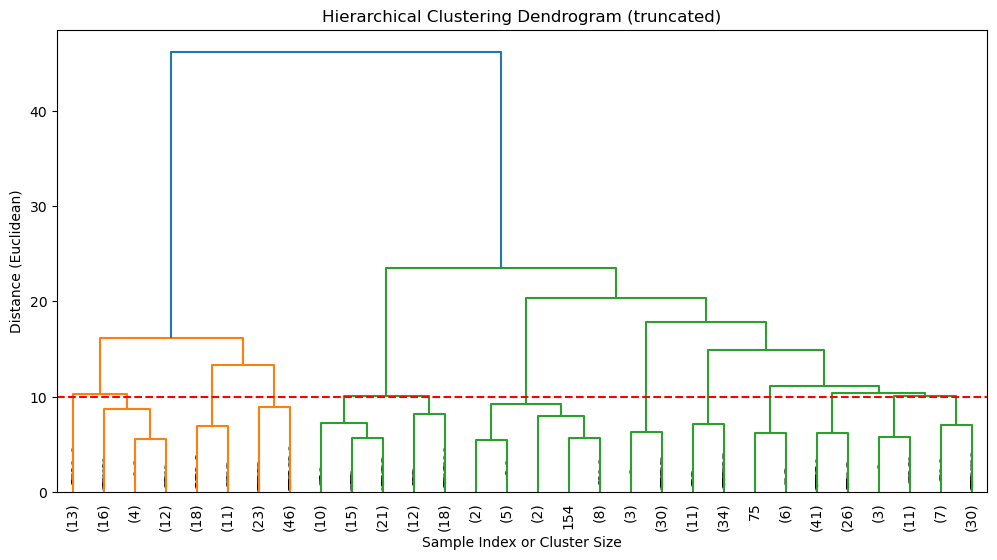

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

#Create the linkage matrix
linked = linkage(scaled_features, method='ward')  # 'ward' minimizes variance

# Ploting the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           truncate_mode='lastp',  # show only the last few merges
           p=30,  # how many merges to show
           leaf_rotation=90,
           leaf_font_size=10,
           show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance (Euclidean)')
plt.axhline(y=12, color='r', linestyle='--')  # Horizontal line to "cut" the dendrogram
plt.show()

The line cuts through 2 major vertical lines: So effectively splitting the dataset into 3 clusters.

In [28]:
num_clusters = 2  

# Assigning cluster labels
labels = fcluster(linked, num_clusters, criterion='maxclust')

# Adding cluster info to your dataframe
df_hierarchical = df.copy()
df_hierarchical['Cluster'] = labels

In [27]:

labels = fcluster(linked, t=12, criterion='distance')

# np.unique(labels, return_counts=True) will show you exactly how many clusters and their sizes
# count how many items in each cluster
unique_labels, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique_labels, counts)))

{1: 45, 2: 29, 3: 69, 4: 76, 5: 18, 6: 33, 7: 45, 8: 125}


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [30]:
pca_transformed = pca.transform(scaled_features)

# Create a DataFrame for easier handling
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(pca_transformed.shape[1])])

#Now pca_df contains the same customers but represented by their position on the principal component axes

c:\Users\ipeko\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


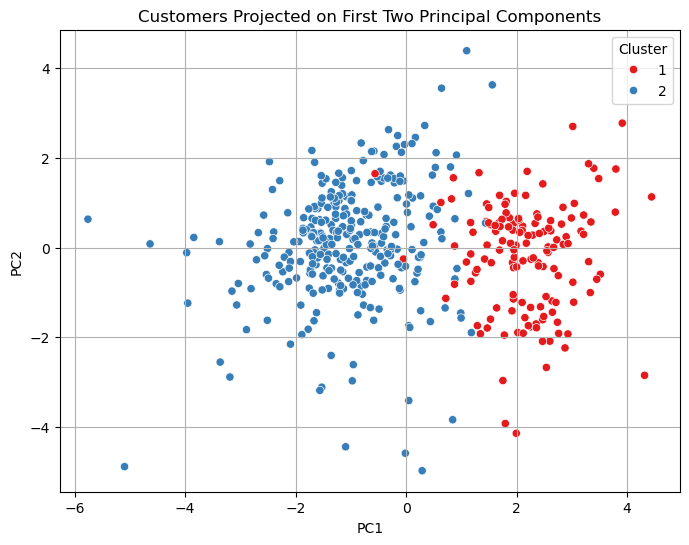

In [31]:
pca_df['Cluster'] = df_hierarchical['Cluster'] 

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('Customers Projected on First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

In [32]:
# Get loadings (how much each original feature contributes to each PC)
pca_components = pd.DataFrame(pca.components_, columns=df.columns)
pca_components.head()  # Each row is PC1, PC2, etc.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.463280,0.027587,-0.111043,0.468107,0.504647,-0.147608,0.501381,0.159113
1,-0.076230,-0.071411,0.568496,0.182580,0.048082,0.574547,-0.023145,0.547370
2,0.030827,0.979801,0.165011,0.010507,-0.051675,-0.076583,-0.039049,0.040509
3,-0.180304,0.057542,-0.608379,0.002896,-0.073709,-0.120006,-0.169531,0.738560
4,0.002562,0.165329,-0.515221,0.065429,0.075704,0.781188,0.058820,-0.288929


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Customer segmentation revealed 2 distinct groups, as identified through both KMeans and Hierarchical Clustering. While KMeans suggested 3 clusters as optimal, adjusting the dendrogram cut height to 12 resulted in 2 broader and more meaningful customer segments. These groups primarily differ in their purchasing volume across key product categories like Grocery, Milk, and Detergents_Paper.


Detergents_Paper, Grocery, and Milk showed high correlation, indicating a strong purchasing pattern among general merchandise buyers. These features dominated the first principal component (PC1), highlighting their importance in defining customer behavior.

Log transformation was crucial for reducing skewness and outlier impact, allowing clustering and PCA to detect meaningful patterns rather than being skewed by extreme values.

PCA showed that the first two components explained most of the differences between customers. This made it easier to look at the data in 2D and clearly see different customer groups.

